<a href="https://colab.research.google.com/github/KaveeshaChan/SDGP-SE-37/blob/sandesi/Headlight_damage_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'


  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-51elqj28
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-51elqj28
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=375645 sha256=79e14cd2677f4209323535f9253595e0aa1dfe026809bc7559b52e4c8fcbc452
  Stored in directory: /tmp/pip-ephem-wheel-cache-x5vsbs29/wheels/39/61/b4/480fbddb4d3d6bc34083e7397bc6f5d1381f79acc68e9f3511
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.7
    Uninstalling pycocotools-2.0.7:
      Successfully uninstalled pycocotools-2.0.7


In [5]:
!pip install tensorflow-object-detection-api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.7 MB/s eta 0:00:00
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844486 sha256=b8c094f17d3f54b44f62949537dd081e38926ae5edef47de2729b9b698f49dea
  Stored in directory: /root/.cache/pip/wheels/8a/55/68/c084bc2cd93c41fd8f7e2ef9e6bbcb2c35a3e4b49e42044d02
Successfully built tensorflow-object-detection-api


Image, Rename and Convert to png

Convert to PNG and rename file for Headlight Undamaged

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/RenamedDataset2/Renamed/not damaged/headlight"
output_folder = "/content/drive/MyDrive/RenamedDataset3/Renamed/newDATA/undamged_headlight "

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Headlight_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

Convert to PNG and rename file for Headlight(minor )

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/RenamedDataset2/Renamed/damged/Minor Damages/headlight (minor)"
output_folder = "/content/drive/MyDrive/RenamedDataset3/Renamed/newDATA/headlight (minor)"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Headlight(minor)_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

Convert to PNG and rename file for Headlight(moderate)

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/RenamedDataset2/Renamed/damged/Moderate Damages/headlight (moderate)"
output_folder = "/content/drive/MyDrive/RenamedDataset3/Renamed/newDATA/headlight (moderate)"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Headlight(moderate)_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

Convert to PNG and rename file for Headlight(severe)

In [ ]:
import os
from PIL import Image

# set paths
input_folder = "/content/drive/MyDrive/RenamedDataset2/Renamed/damged/Severe Damages/headlight (severe)"
output_folder = "/content/drive/MyDrive/RenamedDataset3/Renamed/newDATA/headlight (severe)"

# create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through all files in input folder
for i, filename in enumerate(os.listdir(input_folder)):
    # only process image files
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # open the image file
        with Image.open(os.path.join(input_folder, filename)) as img:
            # convert to PNG format
            img = img.convert("RGB")
            # save with new filename and extension
            new_filename = "Headlight(severe)_"+ str(i+1) + ".png"
            img.save(os.path.join(output_folder, new_filename))

In [6]:
import tensorflow as tf
import os

data_dir = "/content/drive/MyDrive/RenamedDataset3/Renamed/newDATA"
subdirs = os.listdir(data_dir)

for subdir in subdirs:
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        count = len(os.listdir(subdir_path))
        print("Subfolder:", subdir, "Image count:", count)

Subfolder: headlight (minor) Image count: 110
Subfolder: headlight (moderate) Image count: 100
Subfolder: headlight (severe) Image count: 84
Subfolder: undamged_headlight  Image count: 87


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2


In [8]:
!pip install split-folders

In [9]:
!pip install split-folders[full]

In [10]:
import splitfolders

splitfolders.ratio("/content/drive/MyDrive/RenamedDataset3/Renamed/newDATA",
                   output="/content/drive/MyDrive/RenamedDataset3/Renamed/split1",seed=1330, ratio=(.6, .2, .2), group_prefix=None)

data_training_path = "/content/drive/MyDrive/RenamedDataset3/Renamed/split1/train"
data_testing_path = "/content/drive/MyDrive/RenamedDataset3/Renamed/split1/test"
data_validating_path = "/content/drive/MyDrive/RenamedDataset3/Renamed/split1/val"


Copying files: 381 files [04:13,  1.51 files/s]


In [11]:
img_width = 180
img_height = 180
batch_size = 32

data_train = tf.keras.utils.image_dataset_from_directory(
    data_training_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    validation_split=None
)

data_val = tf.keras.utils.image_dataset_from_directory(
    data_validating_path,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False,
    validation_split=None
)

data_test = tf.keras.utils.image_dataset_from_directory(
    data_testing_path,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False,
    validation_split=None
)

class_names = data_train.class_names


Found 78 files belonging to 4 classes.
Found 75 files belonging to 4 classes.
Found 78 files belonging to 4 classes.


In [12]:
base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


9406464/9406464 [==============================] - 1s 0us/step


In [13]:
epochs = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs)


Epoch 1/25
3/3 [==============================] - 15s 4s/step - loss: 1.6889 - accuracy: 0.2179 - val_loss: 1.3872 - val_accuracy: 0.2800
Epoch 2/25
3/3 [==============================] - 8s 2s/step - loss: 1.2728 - accuracy: 0.4487 - val_loss: 1.3062 - val_accuracy: 0.3600
Epoch 3/25
3/3 [==============================] - 9s 3s/step - loss: 1.0710 - accuracy: 0.4744 - val_loss: 1.2679 - val_accuracy: 0.5333
Epoch 4/25
3/3 [==============================] - 19s 7s/step - loss: 0.8313 - accuracy: 0.6538 - val_loss: 1.2538 - val_accuracy: 0.4533
Epoch 5/25
3/3 [==============================] - 11s 4s/step - loss: 0.7610 - accuracy: 0.7436 - val_loss: 1.2552 - val_accuracy: 0.4800
Epoch 6/25
3/3 [==============================] - 10s 3s/step - loss: 0.6517 - accuracy: 0.7692 - val_loss: 1.3200 - val_accuracy: 0.5200
Epoch 7/25
3/3 [==============================] - 10s 3s/step - loss: 0.6317 - accuracy: 0.7308 - val_loss: 1.3301 - val_accuracy: 0.5200
Epoch 8/25
3/3 [====================

In [14]:
model.save('headlight_damage_model_mobilenet.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
model.save('headlight_damage_model_mobilenet.keras')


1/1 [==============================] - 1s 971ms/step
The uploaded image shows no damage.


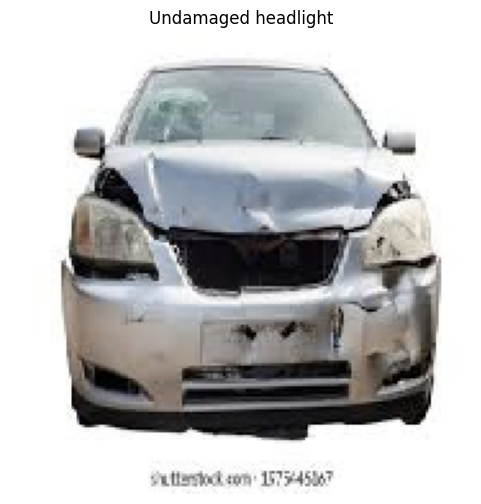

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('headlight_damage_model_mobilenet.keras')

# Define image dimensions
img_width = 180
img_height = 180


# Function to estimate cost range and decision based on damage severity for headlight
def estimate_headlight_cost(severity):
    if severity == "Minor":
        return "Repair", "$100 - $500"
    elif severity == "Moderate":
        return "Replace", "$500 - $1000"
    elif severity == "Severe":
        return "Replace", "Over $1000"
    else:
        return "N/A", "N/A"

# Load and preprocess the image
image_path = "/content/drive/MyDrive/headlight/Renamed/WhatsApp Image 2024-02-19 at 12.44.58.jpeg"
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = tf.expand_dims(image_array, 0)

# Predict the class of the image
prediction = loaded_model.predict(image_array)
predicted_class_index = np.argmax(prediction)
confidence = np.max(prediction) * 100

# Define class names
class_names = ['undamaged', 'minor damage', 'moderate damage', 'severe damage']

# Check if the predicted class indicates damage
if class_names[predicted_class_index] != 'undamaged':
    # Further analyze the confidence level to categorize the damage
    if confidence >= 80:
        damage_category = 'Severe'
    elif confidence >= 60:
        damage_category = 'Moderate'
    else:
        damage_category = 'Minor'

    print("The uploaded image shows", damage_category, "damage with a confidence of", confidence, "%.")

    # Estimate damage cost based on severity
    repair_decision, cost_range = estimate_headlight_cost(damage_category)

    # Display the image with the predicted damage category and cost information
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Uploaded Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    text = f"Vehicle Part: Headlight\n"
    text += f"Predicted Damage: {damage_category}\n"
    text += f"Confidence: {confidence:.2f}%\n\n"
    text += f"Repair Decision: {repair_decision}\n"
    text += f"Cost Range: {cost_range}"
    plt.text(0.5, 0.5, text, horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis("off")



    plt.show()
else:
    print("The uploaded image shows no damage.")

    # Display the undamaged image
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title("Undamaged headlight")
    plt.axis("off")
    plt.show()
